Analysing Amazon Sales Data

In [85]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
# Loading the dataset
sales_data = pd.read_csv('Amazon Sales data.csv')

In [89]:
# Display the first five rows of the data
sales_data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [91]:
# Checking for missing values
missing_values = sales_data.isnull().sum()
print('Missing values:\n')
print(missing_values)

Missing values:

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64


Data is already cleaned as there is no missing values.

In [94]:
# Convert 'Order Date' to Datetime format and extract Year and Month
data['Order Date'] = pd.to_datetime(data['Order Date'], errors='coerce')
data['Year'] = data['Order Date'].dt.year
data['Month'] = data['Order Date'].dt.month
data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Year,Month
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2010,5
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36,2012,8
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75,2014,5
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82,2014,6
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2013,2


Data Analysis
- Summary statistics for Key Features

In [113]:
# Number of Regions
print("Number of Regions: ", data['Region'].nunique())

Number of Regions:  7


There are 7 different regions in our Dataset

In [99]:
# Number of Countries
print("Number of Countries: ", data['Country'].nunique())

Number of Countries:  76


There are 76 different Countries in our Dataset

In [126]:
# Number of Item Types
print("Number of Item Types: ", data['Item Type'].nunique())

Number of Item Types:  12


There are 12 different Item Types in our Dataset

In [129]:
# Total Units Sold
print("Total Units Sold: ", data['Units Sold'].sum())

Total Units Sold:  512871


In [131]:
# Total Unit Cost
print('Total Unit cost:', data['Unit Cost'].sum())

Total Unit cost: 19104.8


In [133]:
# Total Revenue
print('Total Revenue:', data['Total Revenue'].sum())

Total Revenue: 137348768.31


In [135]:
# Total Cost
print('Total Cost:', data['Total Cost'].sum())

Total Cost: 93180569.91000001


In [137]:
# Total Profit
print('Total Profit:', data['Total Profit'].sum())

Total Profit: 44168198.39999999


In [154]:
# Grouping Total Profit by Region and Sales Channel
region_sales_profit = data.groupby(['Region', 'Sales Channel'])['Total Profit'].sum()
print('Total Profit by Region and Sales Channel:')
print(region_sales_profit)

Total Profit by Region and Sales Channel:
Region                             Sales Channel
Asia                               Offline          3584286.33
                                   Online           2529559.54
Australia and Oceania              Offline          1886283.82
                                   Online           2835876.21
Central America and the Caribbean  Offline          2475814.99
                                   Online            371092.86
Europe                             Offline          5574539.91
                                   Online           5508398.72
Middle East and North Africa       Offline          2169081.08
                                   Online           3592110.78
North America                      Offline          1457942.76
Sub-Saharan Africa                 Offline          7772777.78
                                   Online           4410433.62
Name: Total Profit, dtype: float64


Hence 'Asia', 'Central America and the Caribbean', 'Europe' and 'Sub-Sahran Africa' are having more profit in Offline and others are having more profit in Online and 'North America' only have Offline Option

Data Visualisation 

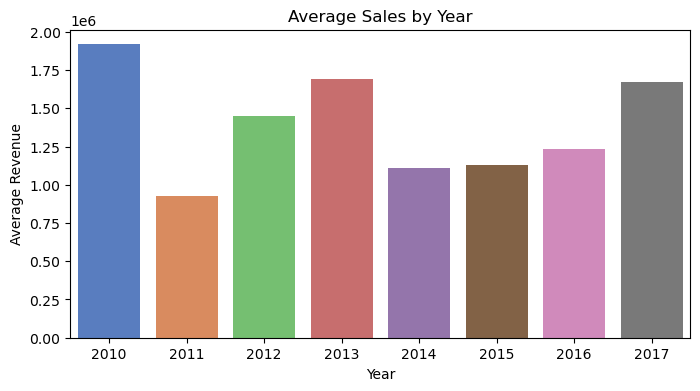

In [180]:
# Plot 1: Average Sales by Year (Bar Chart)
year_sales = data.groupby('Year')['Total Revenue'].mean().reset_index()

plt.figure(figsize=(8, 4))
sns.barplot(data=year_sales, x='Year', y='Total Revenue', hue='Year', palette='muted', legend=False)
plt.title('Average Sales by Year')
plt.xlabel('Year')
plt.ylabel('Average Revenue')
plt.show()

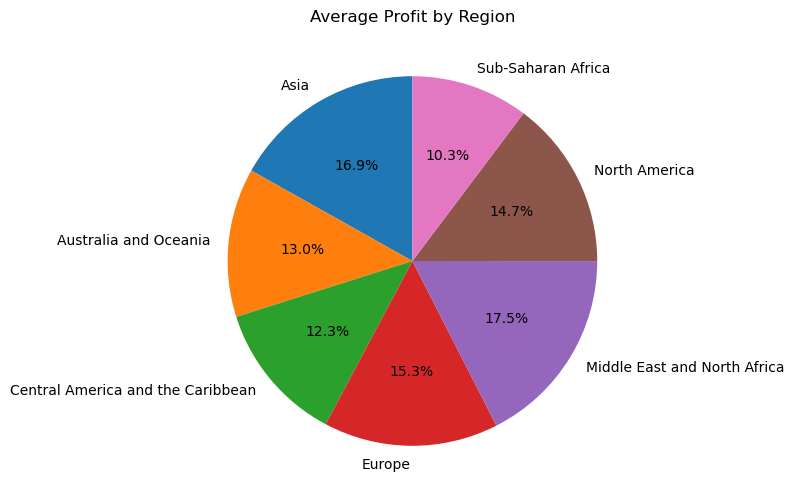

In [182]:
# Plot 2: Average Profit by Region (Pie Chart)
region_profit = data.groupby('Region')['Total Profit'].mean()

plt.figure(figsize=(6, 6))
plt.pie(region_profit, labels=region_profit.index, autopct='%1.1f%%', startangle=90)
plt.title('Average Profit by Region')
plt.show()

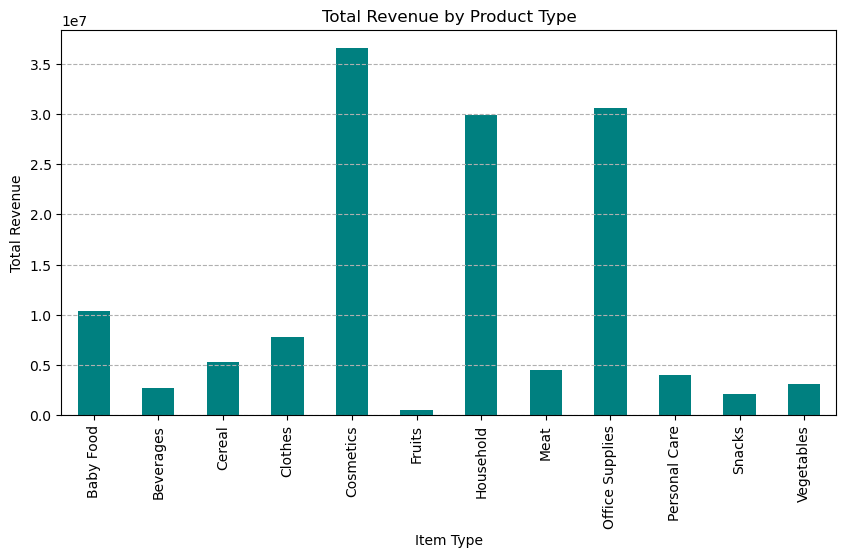

In [184]:
# Plot 3: Total Revenue by Item Type (Bar Chart)
item_revenue = data.groupby('Item Type')['Total Revenue'].sum()

plt.figure(figsize=(10, 5))
item_revenue.plot(kind='bar', color='teal')
plt.xlabel('Item Type')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Product Type')
plt.grid(axis='y', linestyle='--')
plt.show()

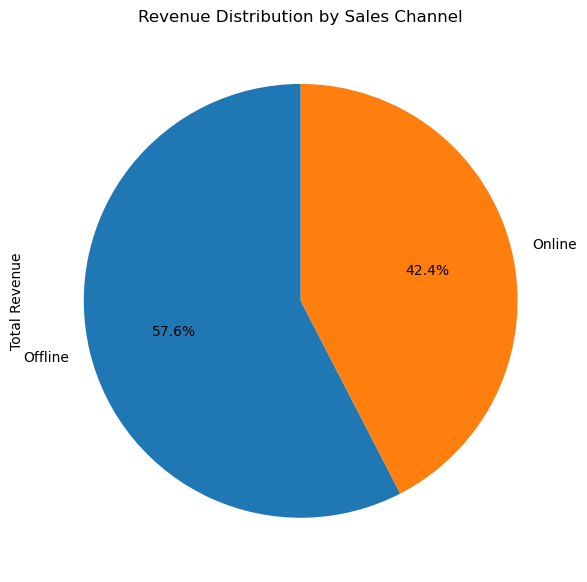

In [186]:
# Plot 4: Total Revenue by Sales Channel(Pie Chart)
sales_channel_revenue = data.groupby('Sales Channel')['Total Revenue'].mean()

plt.figure(figsize=(6, 6))
sales_channel_revenue.plot(kind='pie', autopct='%.1f%%', startangle=90)
plt.title('Revenue Distribution by Sales Channel')
plt.tight_layout()
plt.show()

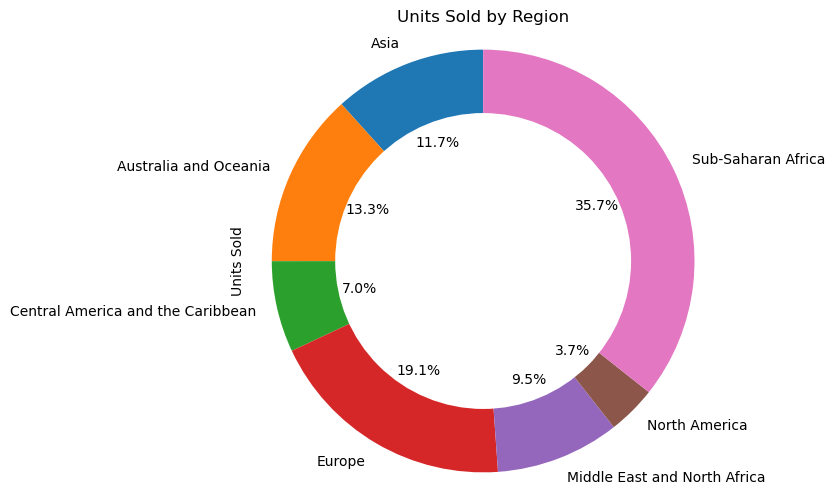

In [188]:
# Plot 5: Units Sold by Region (Donut Chart)
units_sold_region = data.groupby('Region')['Units Sold'].sum()

plt.figure(figsize=(6, 6))
units_sold_region.plot(kind='pie', autopct='%1.1f%%', startangle=90)
center_circle = plt.Circle((0, 0), 0.70, fc='white')  # Donut effect
fig = plt.gcf()
fig.gca().add_artist(center_circle)
plt.title('Units Sold by Region')
plt.axis('equal')  # Ensure the pie is a perfect circle
plt.show()

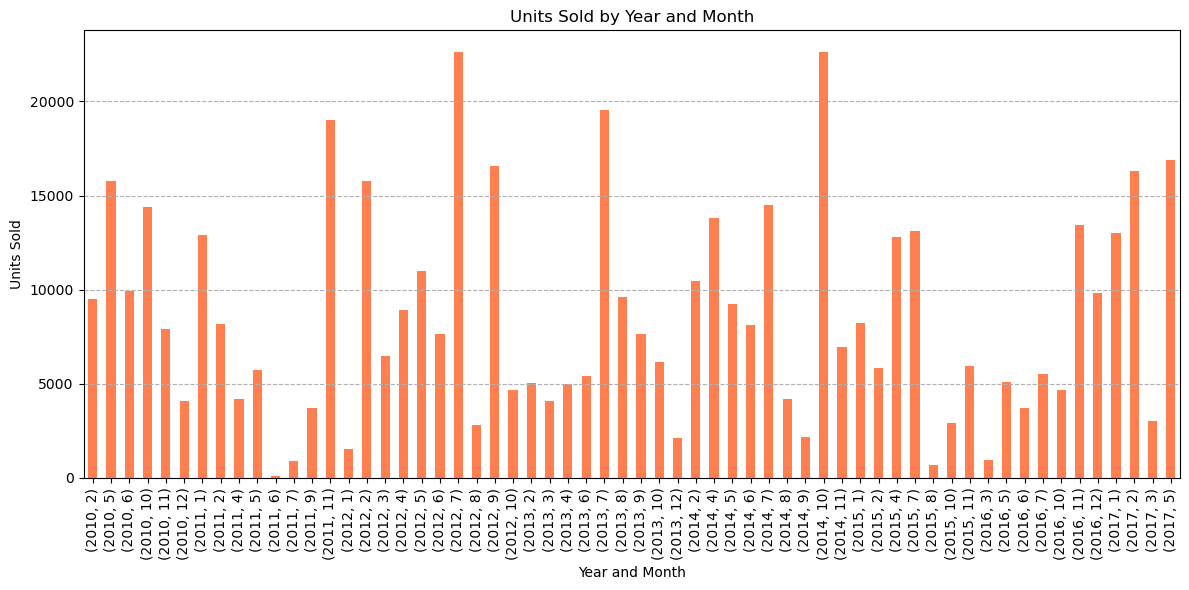

In [190]:
# Plot 6: Units Sold by Year and Month (Bar Chart)
units_sold_ym = data.groupby(['Year', 'Month'])['Units Sold'].sum()

plt.figure(figsize=(12, 6))
units_sold_ym.plot(kind='bar', color='coral')
plt.xlabel('Year and Month')
plt.ylabel('Units Sold')
plt.title('Units Sold by Year and Month')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

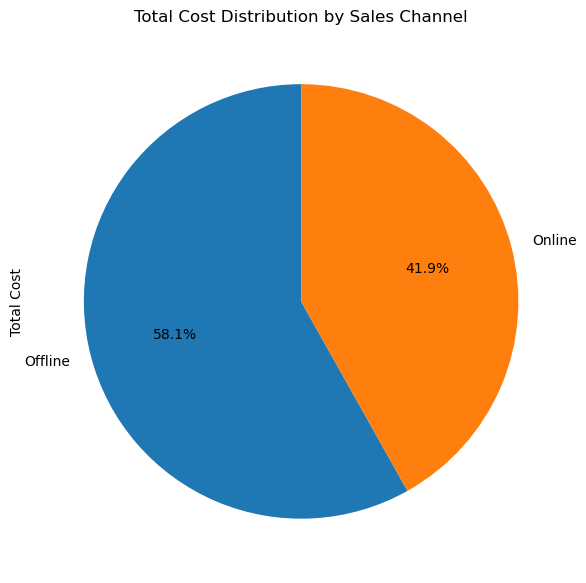

In [192]:
# Plot 7: Total Cost by Sales Channel (Pie Chart)
sales_channel_cost = data.groupby('Sales Channel')['Total Cost'].sum()

plt.figure(figsize=(6, 6))
sales_channel_cost.plot(kind='pie', autopct='%.1f%%', startangle=90)
plt.title('Total Cost Distribution by Sales Channel')
plt.tight_layout()
plt.show()